# Monty Hall Simulator
Python code to simulate Monty Hall games, to verify the success rates for the two strategies.

## Worked example
The following code walks through one game, where the player decides to switch.

In [11]:
# Monty Hall Code

import random
doors = {1, 2, 3}
switch = True # Player's strategy is to switch doors

car_door = random.sample(doors, 1)[0]
initial_choice = random.sample(doors, 1)[0]
print('The player initially selected door {}.'.format(initial_choice))
monty_door = (doors - {car_door, initial_choice}).pop()
print('Monty opens the door {}, showing the user a goat.'.format(monty_door))

if switch:
    final_choice = (doors - {monty_door, initial_choice}).pop()
else:
    final_choice = initial_choice
print('Player decides to switch doors, to door {}.'.format(final_choice))

print('The car is behind door {}.'.format(car_door))

if final_choice == car_door:
    print('Player wins!')
else:
    print('Player loses!')

The player initially selected door 2.
Monty opens the door 3, showing the user a goat.
Player decides to switch doors, to door 1.
The car is behind door 1.
Player wins!


## Running multiple iterations

The following code runs the game 1000 times for each strategy (switch / stick)

In [12]:
num_iter = 1000
doors = {1, 2, 3}

def monty_hall_runner(switch, num_iter):
    """
    Runs the Monty Hall game num_iter times.
    The switch parameter is a boolean - indicates whether the strategy
    is to switch (True) or stay (False)
    """
    num_wins = 0
    
    for x in range(1, num_iter):
        car_door = random.sample(doors, 1)[0]
        initial_choice = random.sample(doors, 1)[0]
        monty_door = (doors - {car_door, initial_choice}).pop()
        if switch:
            final_choice = (doors - {monty_door, initial_choice}).pop()
        else:
            final_choice = initial_choice

        if final_choice == car_door:
            num_wins += 1
    return num_wins

switch_wins = monty_hall_runner(True, num_iter)
stay_wins = monty_hall_runner(False, num_iter)

print('For each strategy, the game was played {} times.'.format(num_iter))
print('Using the switching strategy, the player won {} times.'.format(switch_wins))
print('Using the staying strategy, the player won {} times.'.format(stay_wins))

For each strategy, the game was played 1000 times.
Using the switching strategy, the player won 668 times.
Using the staying strategy, the player won 318 times.


## Charts of the results

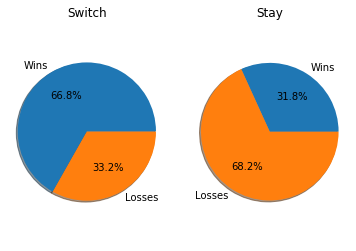

In [13]:
import matplotlib.pyplot as plt
# %matplotlib inline

labels = 'Wins', 'Losses'
switch_sizes = [switch_wins, num_iter - switch_wins]
stay_sizes = [stay_wins, num_iter - stay_wins]

plt.figure(1)

plt.subplot(121)
plt.pie(switch_sizes, labels=labels, autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.title('Switch')

plt.subplot(122)
plt.pie(stay_sizes, labels=labels, autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.title('Stay')

plt.show()